##What are the characteristics of users who convert (behavioural and demographic)

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [268]:
df = pd.read_csv('/Users/youziya/Downloads/conversion_data.csv')

In [269]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [271]:
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


In [272]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


Data cleaning
There are no missing data. There is no null value observed and no duplicates observed. 
There is one wrong data type, I converted the converted_Fri from object type to int type.
There are no outliers. I used the boxplot and histogram to draw graphs. Then calcualted the skeness and kurtosis. As there are many columns, I used z score to drop outliers. After dropping the outliers, the df.info remain unchanged which means most data are normally distrubuted.
From the analysis above, we can note that exclude the visitor_location, marketing_channel, and gender column, all other columns are not object values. 
We can furthure divided these columns into numerical columns and categroical columns.
categorical values: product views, pages visited, converted_Fri
numerical values: avg_rating, avg_price, time_on_site
objects but will be categorical values: location, marketing channel, and gender


In [273]:
# this column is not necessary for analysing
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [274]:
#no columns have null value
df.isnull().sum()

visitor_id           0
visitor_location     0
marketing_channel    0
gender               0
product_views_Mon    0
product_views_Tue    0
product_views_Wed    0
product_views_Thu    0
product_views_Fri    0
avg_rating_Mon       0
avg_rating_Tue       0
avg_rating_Wed       0
avg_rating_Thu       0
avg_rating_Fri       0
avg_price_Mon        0
avg_price_Tue        0
avg_price_Wed        0
avg_price_Thu        0
avg_price_Fri        0
time_on_site_Mon     0
time_on_site_Tue     0
time_on_site_Wed     0
time_on_site_Thu     0
time_on_site_Fri     0
pages_visited_Mon    0
pages_visited_Tue    0
pages_visited_Wed    0
pages_visited_Thu    0
pages_visited_Fri    0
converted_Fri        0
dtype: int64

In [275]:
df['converted_Fri'] = df['converted_Fri'].astype(int)


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [263]:
import pandas as pd

try:
    df = pd.read_csv("/Users/youziya/Downloads/conversion_data.csv")  # Replace with your actual data file
except Exception as e:
    print("Error loading data:", e)

if df is not None:
    duplicate_rows = df.duplicated(subset=df2.columns)
    print(df[duplicate_rows])
    df_cleaned = df[~duplicate_rows]
    print(df_cleaned)

AttributeError: 'NoneType' object has no attribute 'columns'

In [277]:
duplicate_rows = df.duplicated(subset=df.columns)

In [278]:
num_duplicate_rows = duplicate_rows.sum() 
num_duplicate_rows

0

In [279]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [280]:
#although some of them are categorical, putting them here just for histrogram
numerical_columns = [ 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri']

#'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri'

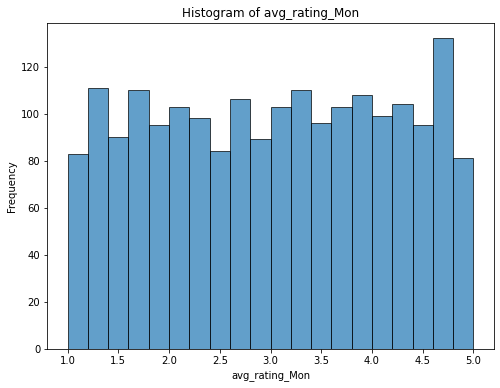

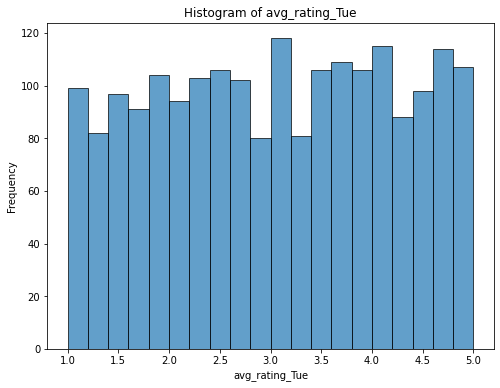

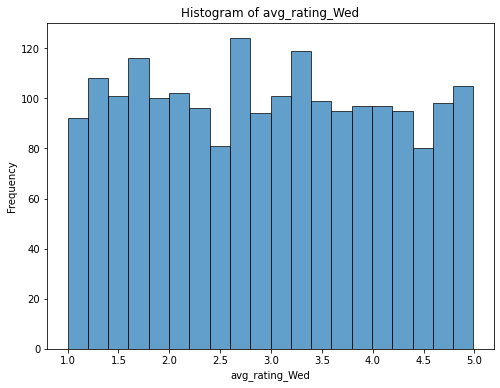

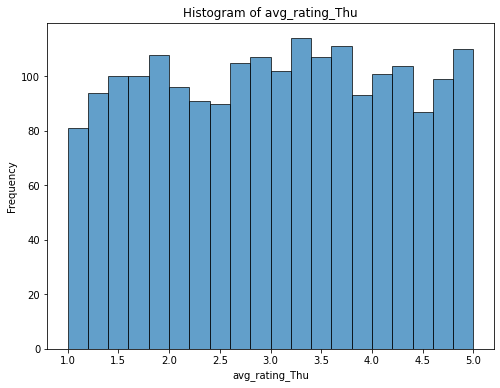

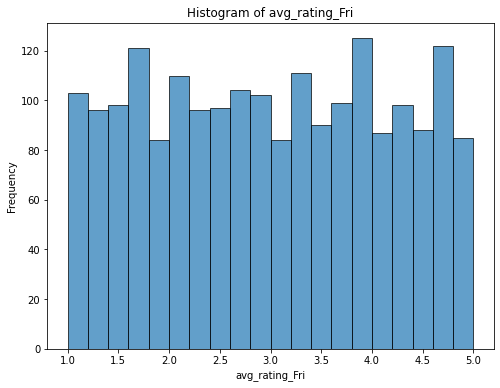

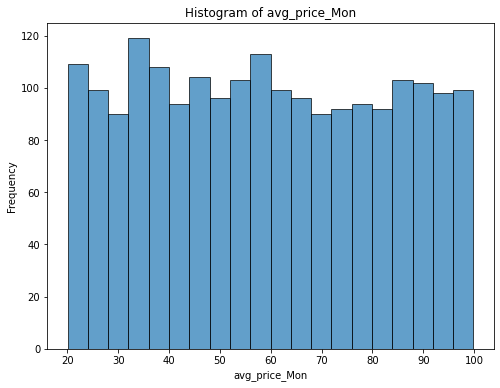

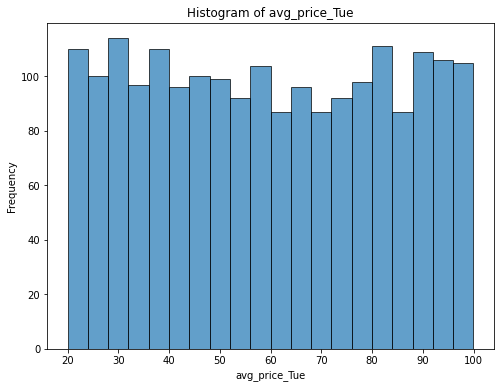

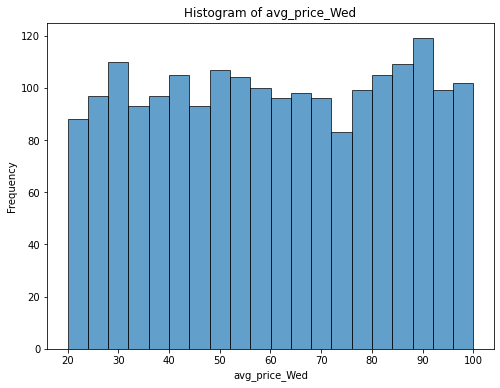

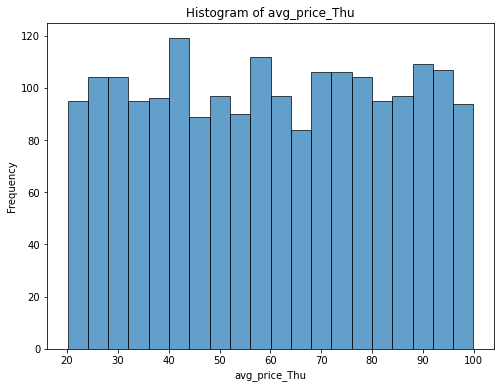

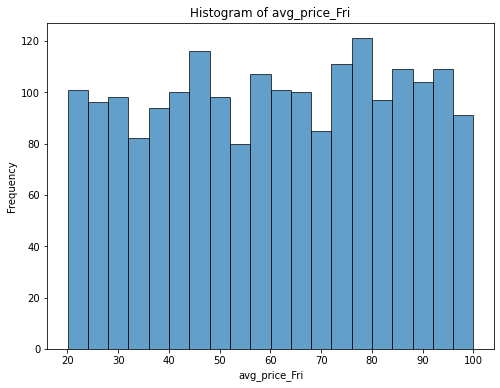

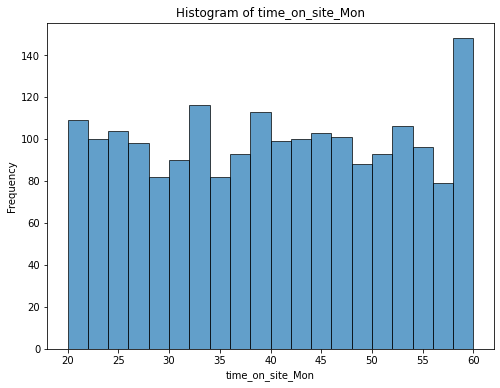

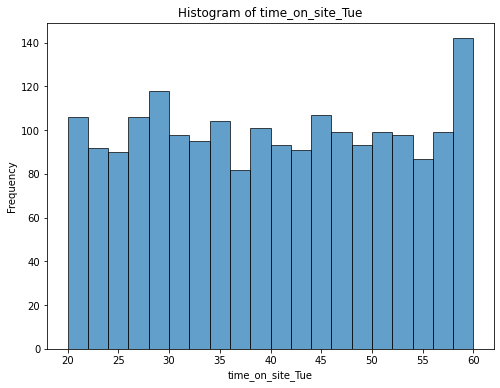

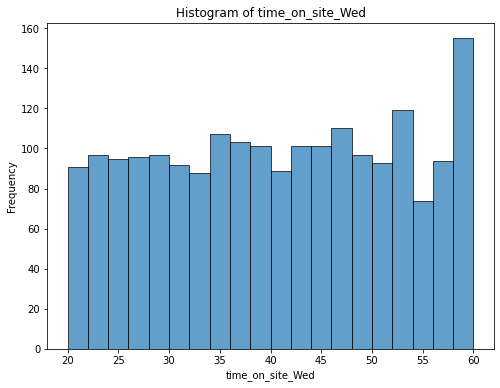

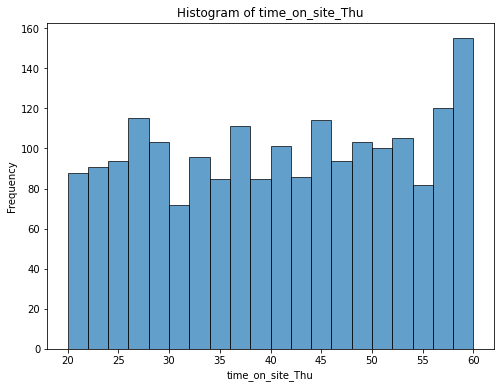

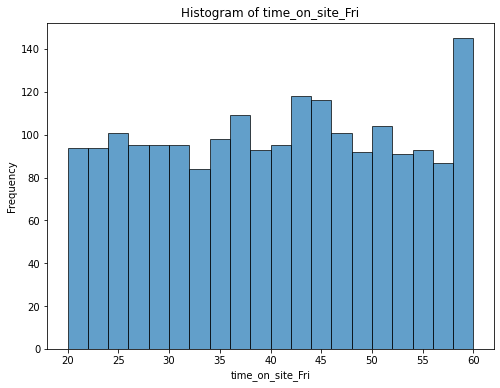

In [281]:
# plot the histogram for each numerical columns

num_bins = 20

for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
    plt.hist(df[column], bins=num_bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [282]:
# calcualte skeness to better drop outliers
for column in numerical_columns:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

avg_rating_Mon: skewness = -0.036569401570234646, kurtosis = -1.2192260019428236
avg_rating_Tue: skewness = -0.04306188757167769, kurtosis = -1.192970789047595
avg_rating_Wed: skewness = 0.04108520953174745, kurtosis = -1.175952222375065
avg_rating_Thu: skewness = -0.021059652207191585, kurtosis = -1.1665255431135517
avg_rating_Fri: skewness = 0.0011903008781474437, kurtosis = -1.2093578638463074
avg_price_Mon: skewness = 0.04475490871743474, kurtosis = -1.2066916544930508
avg_price_Tue: skewness = 0.02480764664794289, kurtosis = -1.2566830578426142
avg_price_Wed: skewness = -0.011190086926561342, kurtosis = -1.2246138048981183
avg_price_Thu: skewness = -0.0024596812160298524, kurtosis = -1.2119026843095375
avg_price_Fri: skewness = -0.05371918441986527, kurtosis = -1.198569783783552
time_on_site_Mon: skewness = 0.00775495824309856, kurtosis = -1.1834401349813246
time_on_site_Tue: skewness = 0.026756044875422436, kurtosis = -1.207058766468054
time_on_site_Wed: skewness = -0.01544707225

In [283]:
#as there are too many numerical columns, use z socre to remove outliers
if abs(s) > 1:
        df[column] = df[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df[numerical_columns])
threshold = 3
df2 = df[(np.abs(z_scores) < threshold).all(axis=1)]

<AxesSubplot:xlabel='converted_Fri', ylabel='product_views_Fri'>

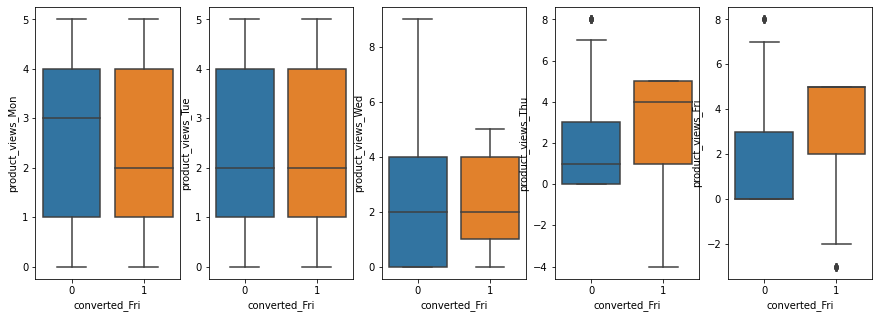

In [292]:
#for product views
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='product_views_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='product_views_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='product_views_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='product_views_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='product_views_Fri', data=df2, ax=ax5)


<AxesSubplot:xlabel='converted_Fri', ylabel='avg_rating_Fri'>

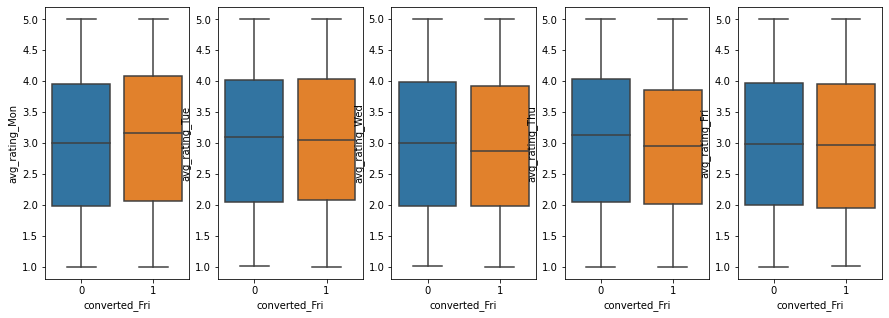

In [286]:
#for average rating
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='avg_rating_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_rating_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_rating_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_rating_Fri', data=df2, ax=ax5)

<AxesSubplot:xlabel='converted_Fri', ylabel='avg_price_Fri'>

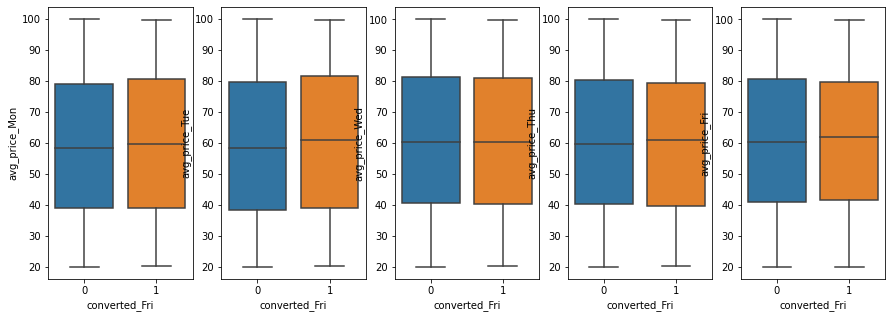

In [287]:
#for average price
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='avg_price_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_price_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_price_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_price_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_price_Fri', data=df2, ax=ax5)

<AxesSubplot:xlabel='converted_Fri', ylabel='time_on_site_Fri'>

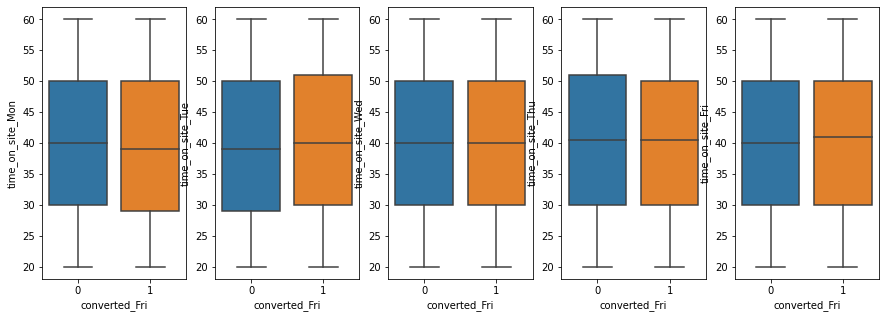

In [288]:
#for time on site
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='time_on_site_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='time_on_site_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='time_on_site_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='time_on_site_Fri', data=df2, ax=ax5)


<AxesSubplot:xlabel='converted_Fri', ylabel='pages_visited_Fri'>

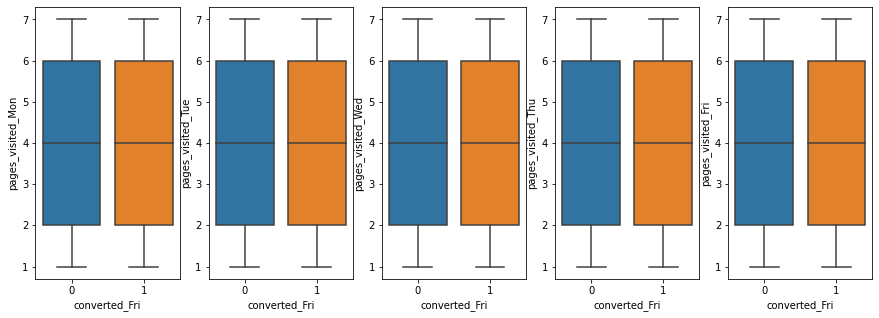

In [289]:
#for pages visited
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='pages_visited_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='pages_visited_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='pages_visited_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='pages_visited_Fri', data=df2, ax=ax5)


product views: spread ranges a lot so product views is not meaningful to anaylysis
avg rating is within a range so this is meaningful to our analysis
avg price is within a range and is meaningful
time on site is also meaningful
pages_visited is meaningful


In [290]:
descriptive_stats = df2.describe()
print(descriptive_stats)

        visitor_id  product_views_Mon  product_views_Tue  product_views_Wed  \
count  2000.000000        2000.000000        2000.000000        2000.000000   
mean   1000.500000           2.541500           2.440500           2.441000   
std     577.494589           1.704914           1.715206           2.343345   
min       1.000000           0.000000           0.000000           0.000000   
25%     500.750000           1.000000           1.000000           0.000000   
50%    1000.500000           3.000000           2.000000           2.000000   
75%    1500.250000           4.000000           4.000000           4.000000   
max    2000.000000           5.000000           5.000000           9.000000   

       product_views_Thu  product_views_Fri  avg_rating_Mon  avg_rating_Tue  \
count        2000.000000        2000.000000     2000.000000     2000.000000   
mean            2.256500           2.354000        3.023990        3.042760   
std             2.370974           2.335682        

In [295]:
df2.groupby(['converted_Fri','gender'])['visitor_id'].count().unstack()

gender,F,M
converted_Fri,,
0,602,654
1,491,253


In [296]:
df2.groupby(['converted_Fri','visitor_location'])['visitor_id'].count().unstack()

visitor_location,Asia,Australia,Europe,North America,South America
converted_Fri,,,,,
0,231,268,235,267,255
1,138,135,148,145,178


In [297]:
df2.groupby(['converted_Fri','marketing_channel'])['visitor_id'].count().unstack()

marketing_channel,facebook,google,instagram,organic,youtube
converted_Fri,,,,,
0,238,234,257,311,216
1,156,165,174,96,153


Feature enginnering to convert object into dummy variables

In [299]:
for i in ['gender', 'visitor_location','marketing_channel']:
    print(df2.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())

converted_Fri    0    1
gender                 
F              602  491
M              654  253
converted_Fri       0    1
visitor_location          
Asia              231  138
Australia         268  135
Europe            235  148
North America     267  145
South America     255  178
converted_Fri        0    1
marketing_channel          
facebook           238  156
google             234  165
instagram          257  174
organic            311   96
youtube            216  153


In [301]:
df2[df2['converted_Fri']=='0'].describe(include='all')

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
df2[df2['converted_Fri']=='1'].describe(include='all')

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
gender = pd.get_dummies(df2['gender'], dtype=int )

In [304]:
visitor_location = pd.get_dummies(df2['visitor_location'], dtype=int)

marketing_channel = pd.get_dummies(df2['marketing_channel'], dtype=int)


In [305]:
new_df = pd.concat([df2[['avg_rating_Mon','avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed','pages_visited_Thu','pages_visited_Fri']],gender,visitor_location, marketing_channel, df2['converted_Fri']], axis=1)

In [308]:
new_df.dropna(inplace=True)

In [309]:
new_df.columns

Index(['avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M',
       'Asia', 'Australia', 'Europe', 'North America', 'South America',
       'facebook', 'google', 'instagram', 'organic', 'youtube',
       'converted_Fri'],
      dtype='object')

In [313]:
log = LogisticRegression()
log.fit(new_df[['avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M',
       'Asia', 'Australia', 'Europe', 'North America', 'South America',
       'facebook', 'google', 'instagram', 'organic', 'youtube']], new_df['converted_Fri'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [314]:
pred = log.predict(new_df[['avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M',
       'Asia', 'Australia', 'Europe', 'North America', 'South America',
       'facebook', 'google', 'instagram', 'organic', 'youtube']])

In [315]:
print(accuracy_score(pred,new_df['converted_Fri']))
print(f1_score(pred,new_df['converted_Fri']))
print(precision_score(pred,new_df['converted_Fri']))
print(recall_score(pred,new_df['converted_Fri']))

0.6485
0.3751111111111111
0.28360215053763443
0.5538057742782152


In [316]:
pd.DataFrame([log.feature_names_in_,log.coef_.flatten()]).T

,0,1
0,avg_rating_Mon,0.025461
1,avg_rating_Tue,0.017925
2,avg_rating_Wed,-0.013352
3,avg_rating_Thu,-0.083994
4,avg_rating_Fri,0.004927
5,avg_price_Mon,0.000969
6,avg_price_Tue,0.001478
7,avg_price_Wed,-0.00065
8,avg_price_Thu,-0.000671
9,avg_price_Fri,-0.000102


In [317]:
x = new_df[['avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M',
       'Asia', 'Australia', 'Europe', 'North America', 'South America',
       'facebook', 'google', 'instagram', 'organic', 'youtube']]
y = new_df['converted_Fri']

In [318]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [319]:
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC(kernel='linear')


In [320]:
knn.fit(x_train, y_train)
log.fit(x_train, y_train)
nb.fit(x_train, y_train)
svc.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(kernel='linear')

In [321]:
knn.fit(x_train, y_train)
log.fit(x_train, y_train)
nb.fit(x_train, y_train)
svc.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(kernel='linear')

In [322]:
pred_knn = knn.predict(x_test)
pred_log = log.predict(x_test)
pred_nb = nb.predict(x_test)
pred_sv = svc.predict(x_test)

In [323]:
print(f1_score(pred_knn,y_test))
print(f1_score(pred_log,y_test))
print(f1_score(pred_nb,y_test))
print(f1_score(pred_sv,y_test))

0.3474903474903475
0.36936936936936937
0.5197368421052632
0.0


In [324]:
pred_sv

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [325]:
params_svc = {'kernel':['rbf', 'linear', 'poly','sigmoid']}

randomsearch_svc = RandomizedSearchCV(svc, params_svc, cv=10, n_iter= 15, scoring='f1')
randomsearch_svc.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=15. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
randomsearch_svc.best_params_

In [ ]:
log_pred_prob = log.predict_proba(x_test)

In [ ]:
fpr, tpr, tresholds = roc_curve(y_test,log_pred_prob[:,1])

In [ ]:
plt.plot(fpr,tpr)

In [ ]:
gmeans = np.sqrt(tpr*(1-fpr))

In [ ]:
print(tresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])

In [ ]:
tresholds

In [ ]:
gmeans

In [ ]:
#y_pred_new = []
for i in log_pred_prob[:,1]:
  if i < 0.36829385617577914:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

In [ ]:
print(f1_score(y_pred_new,y_test))

In [ ]:
fpr, tpr, tresholds = roc_curve(y_test,y_pred_new)

In [ ]:
plt.plot(fpr,tpr)